In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\vrsali\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\vrsali\Downloads\Usecase3_Dataset.csv")

In [5]:
df.head(2)

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.


In [6]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [7]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

In [8]:
df['tidy_text'] = np.vectorize(remove_pattern)(df["text"],"@[\w]*") 
df.head()

,airline_sentiment,airline,text,tidy_text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,What said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you've added commercials to the experience... tacky.
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!,I didn't today... Must mean I need to take another trip!
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it,and it's a really big bad thing about it


In [11]:
df['tidy_text'] = df['tidy_text'].str.replace("[^a-zA-Z#]"," ")
df.head(10)

,airline_sentiment,airline,text,tidy_text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,What said
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you ve added commercials to the experience tacky
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!,I didn t today Must mean I need to take another trip
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it,and it s a really big bad thing about it
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,seriously would pay a flight for seats that didn t have this playing it s really the only bad thing about flying VA
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",yes nearly every time I fly VX this ear worm won t go away
7,neutral,Virgin America,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",Really missed a prime opportunity for Men Without Hats parody there https t co mWpG grEZP
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",Well I didn t but NOW I DO D
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",it was amazing and arrived an hour early You re too good to me


In [66]:
#['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 3

In [13]:
tokenized_text = df['tidy_text'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_text.head(2)

0                                                       [What, said]
1    [plus, you, ve, added, commercials, to, the, experience, tacky]
Name: tidy_text, dtype: object

In [14]:
tokenized_text = df['tidy_text'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_text.head(10)

0                                                                                                                                   [What, said]
1                                                                                [plus, you, ve, added, commercials, to, the, experience, tacky]
2                                                                              [I, didn, t, today, Must, mean, I, need, to, take, another, trip]
3                   [it, s, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]
4                                                                                            [and, it, s, a, really, big, bad, thing, about, it]
5    [seriously, would, pay, a, flight, for, seats, that, didn, t, have, this, playing, it, s, really, the, only, bad, thing, about, flying, VA]
6                                                                      [yes, nearly, every, time, I, fly, VX, this, ear, worm, won

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_text= tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet

In [16]:
df

,airline_sentiment,airline,text,tidy_text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,What said
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you ve added commercials to the experience tacky
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!,I didn t today Must mean I need to take another trip
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it,and it s a really big bad thing about it
...,...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different flight to Chicago.,thank you we got on a different flight to Chicago
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving over minutes Late Flight No warnings or communication until we were minutes Late Flight That s called shitty customer svc
14637,neutral,American,@AmericanAir Please bring American Airlines to #BlackBerry10,Please bring American Airlines to #BlackBerry
14638,negative,American,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",you have my money you change my flight and don t answer your phones Any other suggestions so I can make my commitment


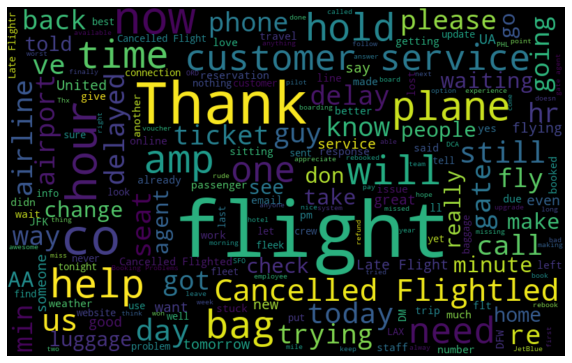

In [18]:
all_words = ' '.join([text for text in df['tidy_text']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Positive word cloud 

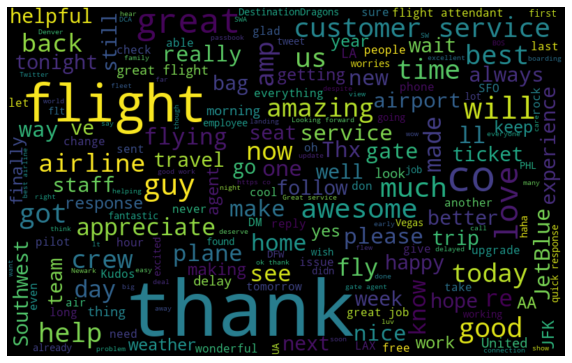

In [75]:
normal_words= ' '.join([text for text in df['tidy_tweet'][df['airline_sentiment']=="positive"]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Negative word cloud

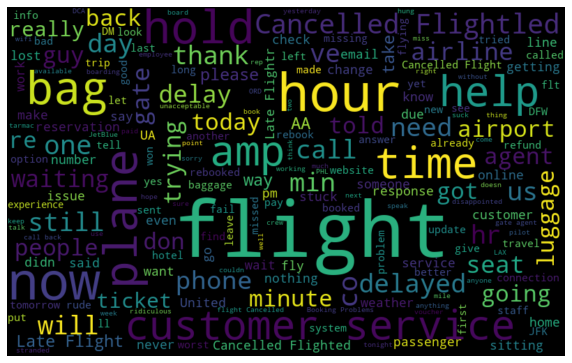

In [76]:
normal_words= ' '.join([text for text in df['tidy_tweet'][df['airline_sentiment']=="negative"]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Neutral word cloud

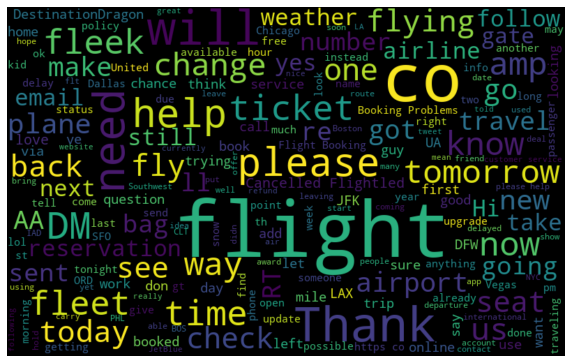

In [78]:
normal_words= ' '.join([text for text in df['tidy_tweet'][df['airline_sentiment']=="neutral"]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [82]:
df

,airline_sentiment,airline,text,tidy_tweet
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,What said
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you ve added commercials to the experience tacky
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!,I didn t today Must mean I need to take another trip
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it,and it s a really big bad thing about it
...,...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different flight to Chicago.,thank you we got on a different flight to Chicago
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving over minutes Late Flight No warnings or communication until we were minutes Late Flight That s called shitty customer svc
14637,neutral,American,@AmericanAir Please bring American Airlines to #BlackBerry10,Please bring American Airlines to #BlackBerry
14638,negative,American,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",you have my money you change my flight and don t answer your phones Any other suggestions so I can make my commitment


In [21]:

#collect hashtags

def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [25]:

#extracting hashtags from positive texts
ht_regular = hashtag_extract(df['tidy_text'][df['airline_sentiment']=="positive"])
#extracting hashtags from racist tweets
ht_negative=hashtag_extract(df['tidy_text'][df['airline_sentiment']=="negative"])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

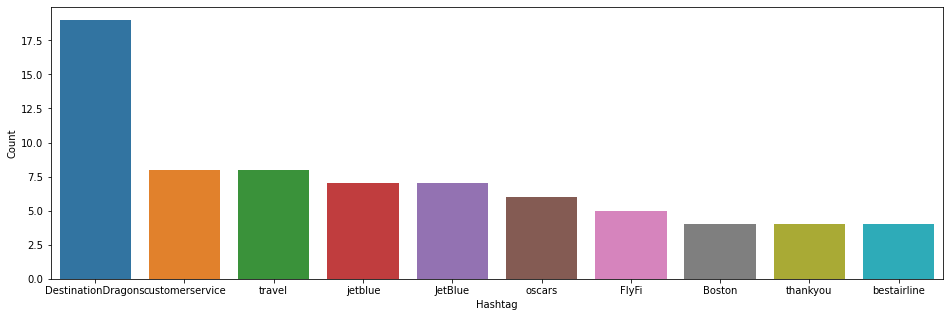

In [28]:

#positive texts

positive_text = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})

#selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

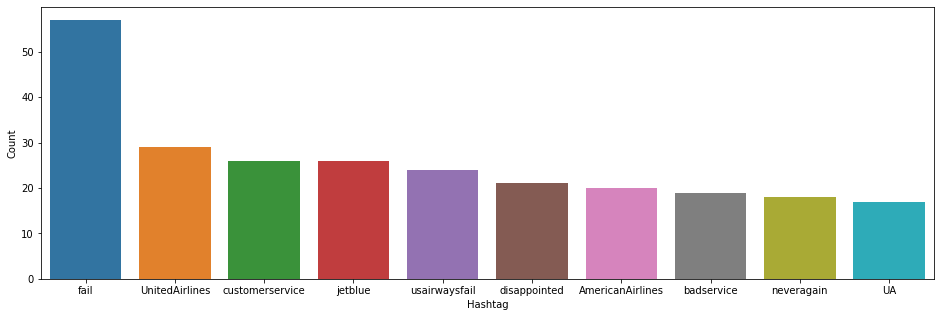

In [33]:
negative_text = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(negative_text.keys()),'Count': list(negative_text.values())}) #count number of occurrence of particular word

#selecting top 10 frequent  hashtags

df2 = df2.nlargest(columns = "Count",n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()


In [88]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\vrsali\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

C:\Users\vrsali\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [37]:
bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df['tidy_text']) # tokenize and build vocabulary
bow.shape

(14640, 1000)

In [38]:
combine=df.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['airline_sentiment'],
                                                    test_size=0.2, random_state=69)

In [39]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (11712, 1000)
X_test_shape :  (2928, 1000)
y_train_shape :  (11712,)
y_test_shape :  (2928,)


In [43]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.7527322404371585


In [47]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
randomcl =clf.fit(X_train,y_train)

predicted_random = randomcl.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_random, y_test)
print("Accuracy with RandomForest: ",score_naive)

Accuracy with RandomForest:  0.7390710382513661


In [59]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

In [60]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

[11:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is: 75.79
Time consumed for training: 0.937
Time consumed for prediction: 0.01467 seconds
